In [1]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import numpy as np
from MPNN_model import logpsi
import netket as nk
import flax

In [2]:
x = jax.random.uniform(jax.random.PRNGKey(42), shape=(1,20,2))
L=20
sdim=2
model = logpsi(L= L, sdim = sdim, graph_number = 1, phi_out_dim = 10, phi_hidden_lyrs = 1, 
                     phi_widths=(10,), rho_widths=(10,), rho_hidden_lyrs=1)

p = model.init(jax.random.PRNGKey(3), x.reshape(1,-1))

2023-04-19 16:38:46.658365: W external/xla/xla/service/gpu/nvptx_compiler.cc:564] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.1.66). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [3]:
y = jax.random.permutation(jax.random.PRNGKey(4), x, axis=-2).reshape(1,-1)
xL = x.at[0,0,0].set(x[0,0,0]+L)
print(x)
print(xL)
x = x.reshape(1,-1)
xL = xL.reshape(1,-1)
print(model.apply(p,x))
print(model.apply(p,y))
print(model.apply(p,xL))

[[[0.70177854 0.69068275]
  [0.38731841 0.93363657]
  [0.25998807 0.91470474]
  [0.51659837 0.17031624]
  [0.40427939 0.84019866]
  [0.67752213 0.6423119 ]
  [0.98954555 0.60391411]
  [0.03076481 0.52089735]
  [0.14883167 0.27407193]
  [0.09764446 0.32044538]
  [0.19254849 0.58867506]
  [0.72264577 0.71508243]
  [0.18347903 0.92048744]
  [0.29307651 0.26621605]
  [0.74681092 0.22376768]
  [0.26288708 0.34864992]
  [0.69815391 0.95768285]
  [0.52366215 0.25969722]
  [0.02175788 0.71380997]
  [0.05830412 0.36328796]]]
[[[20.70177854  0.69068275]
  [ 0.38731841  0.93363657]
  [ 0.25998807  0.91470474]
  [ 0.51659837  0.17031624]
  [ 0.40427939  0.84019866]
  [ 0.67752213  0.6423119 ]
  [ 0.98954555  0.60391411]
  [ 0.03076481  0.52089735]
  [ 0.14883167  0.27407193]
  [ 0.09764446  0.32044538]
  [ 0.19254849  0.58867506]
  [ 0.72264577  0.71508243]
  [ 0.18347903  0.92048744]
  [ 0.29307651  0.26621605]
  [ 0.74681092  0.22376768]
  [ 0.26288708  0.34864992]
  [ 0.69815391  0.95768285]
  

In [2]:
import json

data = json.load(open('log_files/int_bosons_2d_N=16_L=256.log', 'rb'))

Es = jnp.array(data['Energy']['Mean'])
sigmas = jnp.array(data['Energy']['Sigma'])
acceptance = jnp.array(data['acceptance']['value'])
R_hat = jnp.array(data['Energy']['R_hat'])

2023-04-23 00:01:56.498010: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [3]:
window_size = 100
mov_avg = []
mov_std = []
for i in range(len(Es) - window_size + 1):
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = Es[i : i + window_size]
  
    # Calculate the average of current window
    window_average = jnp.mean(window)
    window_std = jnp.std(window)
      
    # Store the average of current
    # window in moving average list
    mov_avg.append(window_average)
    mov_std.append(window_std)

mov_avg = jnp.array(mov_avg)/16
mov_std = jnp.array(mov_std)/16

'\naxins = ax.inset_axes([0.25, 0.5, 0.7, 0.2])\naxins.plot(jnp.arange(len(mov_avg)), mov_avg, color=\'C0\')\naxins.fill_between(jnp.arange(len(mov_avg)), mov_avg - mov_std, mov_avg + mov_std, color=\'C0\', alpha=0.2)\nx1, x2, y1, y2 = 130, 190, 1.237-0.05, 1.237+0.05\naxins.set_xlim(x1, x2)\naxins.set_ylim(y1, y2)\n#axins.set_yticks([1.236, 1.237, 1.238])\naxins.set_xticks([130,160,190])\naxins.yaxis.set_major_formatter(FormatStrFormatter(\'%.2f\'))\naxins.grid(alpha=0.5)\nax.indicate_inset_zoom(axins, edgecolor="black")\n'

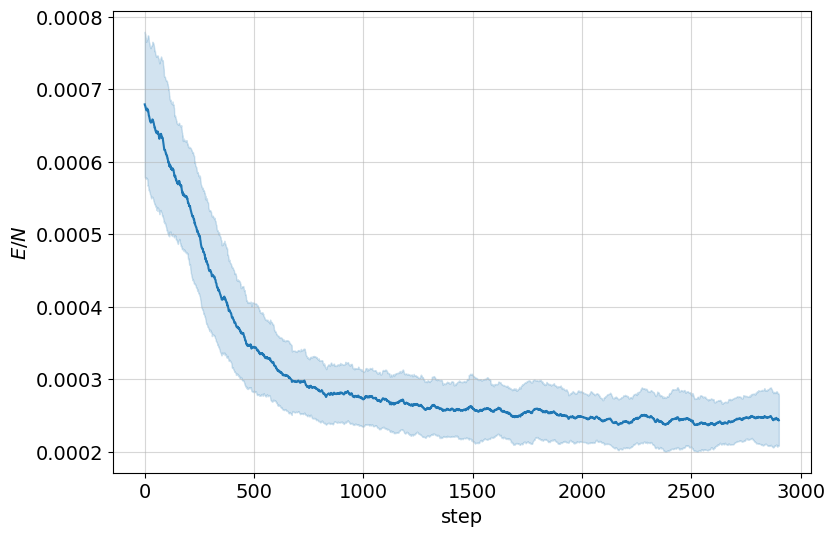

In [4]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(jnp.arange(len(mov_avg)), mov_avg, color='C0')
ax.fill_between(jnp.arange(len(mov_avg)), (mov_avg - mov_std), (mov_avg + mov_std), color='C0', alpha=0.2)
ax.set_xlabel('step')
ax.set_ylabel(r'$E/N$')
ax.grid(alpha=0.5)

"""
axins = ax.inset_axes([0.25, 0.5, 0.7, 0.2])
axins.plot(jnp.arange(len(mov_avg)), mov_avg, color='C0')
axins.fill_between(jnp.arange(len(mov_avg)), mov_avg - mov_std, mov_avg + mov_std, color='C0', alpha=0.2)
x1, x2, y1, y2 = 130, 190, 1.237-0.05, 1.237+0.05
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
#axins.set_yticks([1.236, 1.237, 1.238])
axins.set_xticks([130,160,190])
axins.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axins.grid(alpha=0.5)
ax.indicate_inset_zoom(axins, edgecolor="black")
"""

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


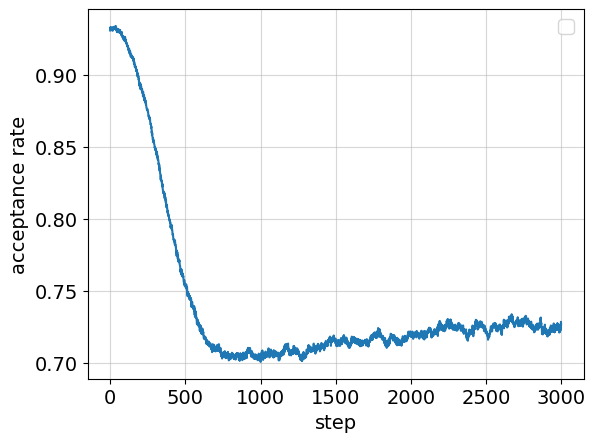

In [66]:
steps = jnp.arange(0,len(acceptance))

fig, ax = plt.subplots()

ax.plot(steps, acceptance)
ax.set_xlabel('step')
ax.set_ylabel(r'acceptance rate')
ax.grid(alpha=0.5)
ax.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


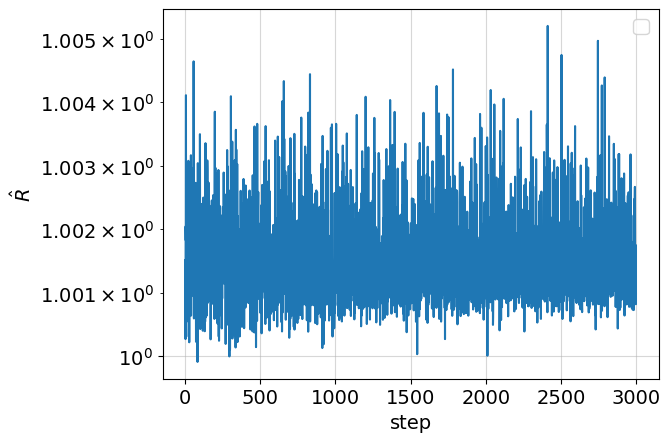

In [67]:
fig, ax = plt.subplots()

ax.plot(steps, R_hat)
ax.set_xlabel('step')
ax.set_ylabel(r'$\hat{R}$')
ax.grid(alpha=0.5)
ax.set_yscale('log')
ax.legend(loc='best')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


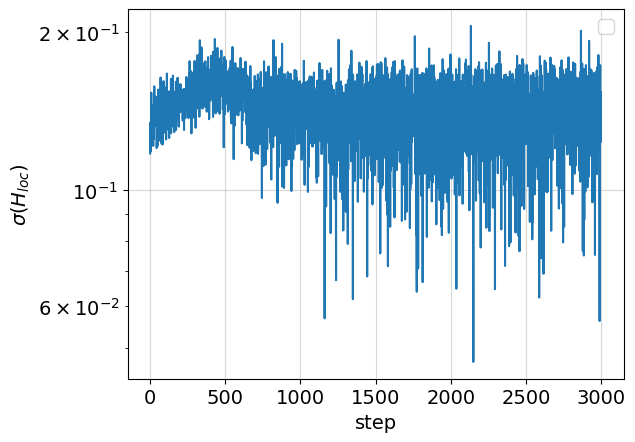

In [68]:
fig, ax = plt.subplots()

ax.plot(steps, sigmas/Es)
ax.set_xlabel('step')
ax.set_ylabel(r'$\sigma(H_{loc})$')
ax.grid(alpha=0.5)
ax.set_yscale('log')
ax.legend(loc='best')

In [60]:
nparticles = 16
L = 36
sdim = 2


hilb = nk.hilbert.Particle(N=nparticles, L=(L,L,), pbc=True)

sab = nk.sampler.MetropolisGaussian(hilb, sigma=0.7, n_chains=16, n_sweeps=32)

model = logpsi(L= L, sdim = sdim, graph_number = 1, phi_out_dim = 10, 
               phi_hidden_lyrs = 1, phi_widths=(10,), rho_widths=(10,), rho_hidden_lyrs=1)

vs = nk.vqs.MCState(sab, model, n_samples=5*10**3, n_discard_per_chain=32)

/home/giorgio/.local/lib/python3.10/site-packages/netket/vqs/mc/mc_state/state.py:58: UserWarning: n_samples=5000 (5000 per MPI rank) does not divide n_chains=16, increased to 5008 (5008 per MPI rank)
  warnings.warn(


In [13]:
import flax

with open("log_files/int_bosons_2d_N=16_L=36.mpack", 'rb') as file:
  params = flax.serialization.from_bytes(vs.variables, file.read())

In [18]:
sab_state = sab.init_state(model, params, jax.random.PRNGKey(1))

sab_state = sab.reset(model, params, sab_state)

samples, sab_state = sab.sample(model, params, state=sab_state, chain_length=10**3)

In [25]:
print(samples.shape, type(samples)) 
rs = samples.reshape(-1,32)
rs.shape

(1000, 16, 32) <class 'jaxlib.xla_extension.ArrayImpl'>


(16000, 32)

In [23]:
def two_body_distribution(xs):
    
    distance = rs - jnp.expand_dims(rs,-1)
    

distance = rs - jnp.expand_dims(rs,-1)

NameError: name 'sample' is not defined